In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 불러오기

In [ ]:
train = pd.read_csv('/content/housing_dataset/train.csv')
test = pd.read_csv('/content/housing_dataset/test.csv')

# 데이터 확인

In [ ]:
train.head() #5번째 행까지의 train data 확인

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


# 특징 확인

In [ ]:
train.columns #train data의 열 정보(feature) 확인

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

Year Built : 완공 연도

Year Remod/Add : 리모델링 연도

Garage Yr Blt : 차고 완공 연도

Overall Qual : 전반적 재료와 마감 품질

Exter Qual : 외관 재료 품질

Bsmt Qual : 지하실 높이

Kitchen Qual : 부엌 품질

Gr Liv Area : 지상층 생활 면적

Total Bsmt SF : 지하실 면적

1st Fls SF : 1층 면적

Garage Area : 차고 면적

Full Bath : 지하층 화장실 갯수

Garage Cars : 차고 자리 개수

# 결측치 확인

In [ ]:
train.isnull().sum() #정상적인 값이 아닌 null이 들어있는지 확인

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [ ]:
test.isnull().sum() #정상적인 값이 아닌 null이 들어있는지 확인

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
dtype: int64

# 연도 관련 데이터 변환

In [ ]:
train['Year Built']=2022-train['Year Built']
train['Year Remod/Add']=2022-train['Year Remod/Add']
train['Garage Yr Blt']=2022-train['Garage Yr Blt']
test['Year Built']=2022-test['Year Built']
test['Year Remod/Add']=2022-test['Year Remod/Add']
test['Garage Yr Blt']=2022-test['Garage Yr Blt']

# 특징 간 상관관계 확인

In [ ]:
data_corr = train.corr() #corr()함수는 데이터 프레임의 열 사이의 상관 관계를 찾는다

data_corr

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,1.000000,0.009727,0.010232,0.005031,0.026733,0.031217,0.022935,-0.012976,0.014630,0.012683,0.043364,0.022934
Overall Qual,0.009727,1.000000,0.588243,0.571066,0.517218,0.509058,0.476398,0.554248,-0.582875,-0.579142,-0.553927,0.810607
Gr Liv Area,0.010232,0.588243,1.000000,0.516287,0.480863,0.419220,0.522535,0.612423,-0.232281,-0.315723,-0.261861,0.742061
Garage Cars,0.005031,0.571066,0.516287,1.000000,0.840054,0.466017,0.445017,0.513078,-0.505803,-0.433307,-0.562320,0.634497
Garage Area,0.026733,0.517218,0.480863,0.840054,1.000000,0.499634,0.485843,0.418852,-0.445816,-0.364369,-0.536310,0.617151
Total Bsmt SF,0.031217,0.509058,0.419220,0.466017,0.499634,1.000000,0.868811,0.367648,-0.403767,-0.265506,-0.347908,0.664047
1st Flr SF,0.022935,0.476398,0.522535,0.445017,0.485843,0.868811,1.000000,0.370299,-0.290443,-0.236692,-0.259898,0.646843
Full Bath,-0.012976,0.554248,0.612423,0.513078,0.418852,0.367648,0.370299,1.000000,-0.508745,-0.472537,-0.498692,0.554453
Year Built,0.014630,-0.582875,-0.232281,-0.505803,-0.445816,-0.403767,-0.290443,-0.508745,1.000000,0.616008,0.815615,-0.546037
Year Remod/Add,0.012683,-0.579142,-0.315723,-0.433307,-0.364369,-0.265506,-0.236692,-0.472537,0.616008,1.000000,0.644251,-0.529477


# 특징 간 상관관계 히트맵 시각화

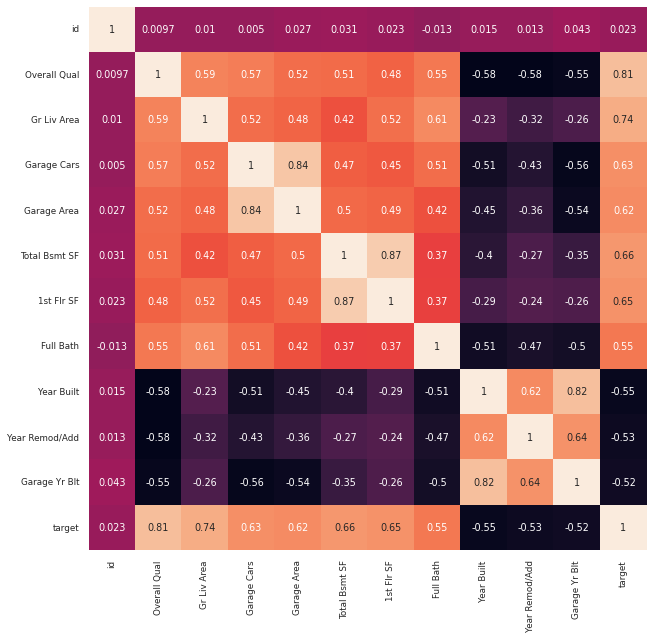

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False) #히트맵 시각화
plt.show()

→ target과의 상관관계 변수가 **음수**여도 상관없다. (절대값으로 보기때문)

# Train 데이터에서 **target**과 관계성이 가장 떨어지는 **id**와 **Overall Qual**과 비슷한 특징인 **Exter Qual, Kitchen Qual, Bsmt Qual** 제거
# train_x와 train_y, test_x 생성

In [ ]:
train_x = train.drop(['id','target','Overall Qual','Exter Qual','Kitchen Qual','Bsmt Qual'], axis=1) #id와 target, 그리고 Overall Qual을 제외한 Qual 특징 제거
train_y = train['target']

test_x = test.drop(['id','Overall Qual','Exter Qual','Kitchen Qual','Bsmt Qual'], axis=1) #id와 Overall Qual을 제외한 Qual 특징 제거

In [ ]:
train_x

,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,2392,3,968,2392,2392,2,19,19,19
1,1352,2,466,1352,1352,2,16,15,16
2,900,1,288,864,900,1,55,55,55
3,1174,2,576,680,680,1,122,16,22
4,1958,3,936,1026,1026,2,17,17,17
...,...,...,...,...,...,...,...,...,...
1345,1756,2,422,872,888,2,26,25,26
1346,2748,3,850,1850,1850,2,16,16,16
1347,1214,1,318,1214,1214,2,55,55,55
1348,894,2,440,864,894,1,48,48,48


# 랜덤포레스트 모델 생성

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 100)

model.fit(train_x,train_y)

RandomForestClassifier()

# Train 데이터 평가

In [ ]:
model.score(train_x, train_y)

0.04148148148148148

# 모델 평가 및 제출

In [ ]:
test_y_pred = model.predict(test_x)

In [ ]:
from sklearn import metrics

print(f"Accuracy: {metrics.accuracy_score(train_y, test_y_pred)}")

Accuracy: 0.005925925925925926


In [ ]:
submission = pd.read_csv("/content/housing_dataset/sample_submission.csv")
submission['target'] = test_y_pred

In [ ]:
submission.to_csv('베이스 라인2 .csv', index = False)